# Importing Libraries of Python

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3177,3178,15759684,Ting,528,France,Female,27,7,176227.07,2,0,1,139481.53,0
3295,3296,15654296,Estrada,754,Spain,Female,19,9,0.00,1,1,0,189641.11,0
4067,4068,15767391,Otutodilinna,565,Germany,Female,32,4,90322.99,2,0,1,118740.37,0
6968,6969,15721793,Chiu,510,Germany,Female,50,7,123936.54,1,1,1,23768.01,0
2484,2485,15587735,Chukwuebuka,850,France,Male,39,6,96863.13,1,1,1,121681.19,0
5581,5582,15812850,Stradford,494,Spain,Male,67,5,0.00,2,1,1,85890.16,0
9126,9127,15666095,Costa,753,Spain,Male,51,4,79811.72,2,0,1,68260.27,1
8242,8243,15790455,Obialo,478,France,Female,50,2,0.00,1,0,1,93332.64,1
7998,7999,15772482,Iloerika,829,Germany,Male,28,3,132405.52,3,1,0,104889.20,1
8932,8933,15700394,Palermo,713,Spain,Female,26,4,122857.46,2,1,0,144682.17,1


In [7]:
df.shape

(10000, 14)

In [8]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
    

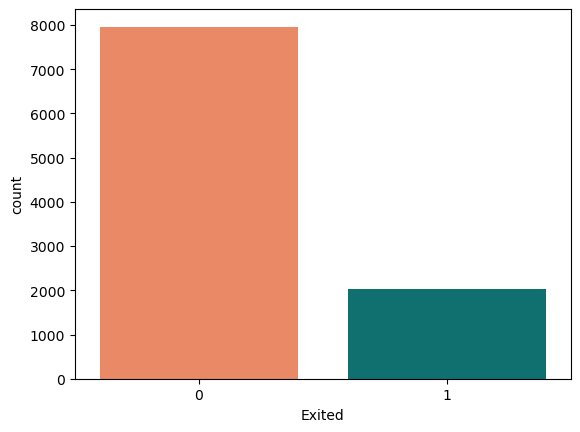

In [9]:
sns.countplot(x="Exited",data=df,palette=["coral","teal"])
plt.show()

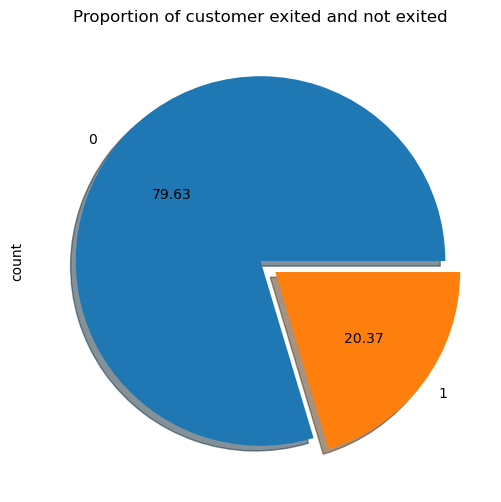

In [10]:
value_counts = pd.value_counts(df['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%.2f', shadow=True)
plt.title('Proportion of customer exited and not exited')
plt.show()

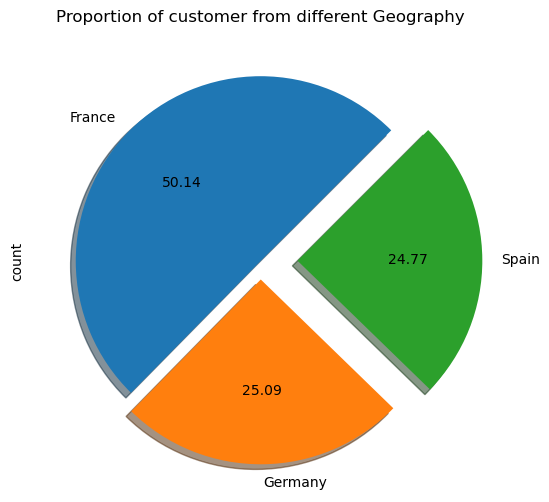

In [11]:

value_counts = pd.value_counts(df['Geography'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1,0.2],autopct='%.2f', shadow=True,startangle=45)
plt.title('Proportion of customer from different Geography')
plt.show()

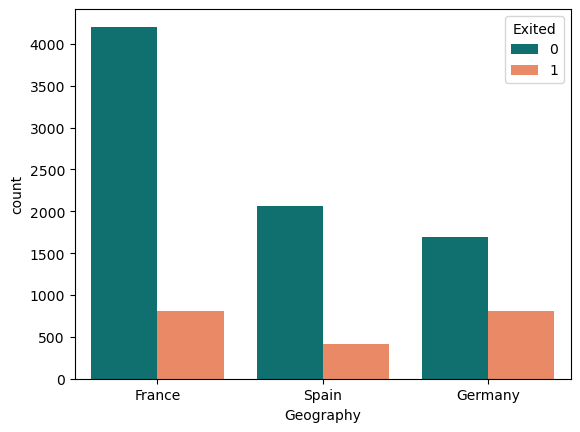

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [12]:
sns.countplot(x="Geography",hue="Exited",palette=["Teal","coral"],data=df)
plt.show()
pd.crosstab(df["Geography"],df["Exited"])
     

<Axes: xlabel='Age', ylabel='Balance'>

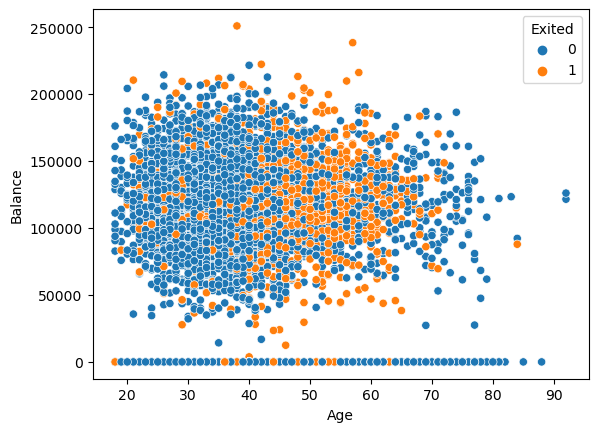

In [13]:

sns.scatterplot(x ="Age", y ="Balance", hue ="Exited", data = df)

<Axes: xlabel='CreditScore', ylabel='Density'>

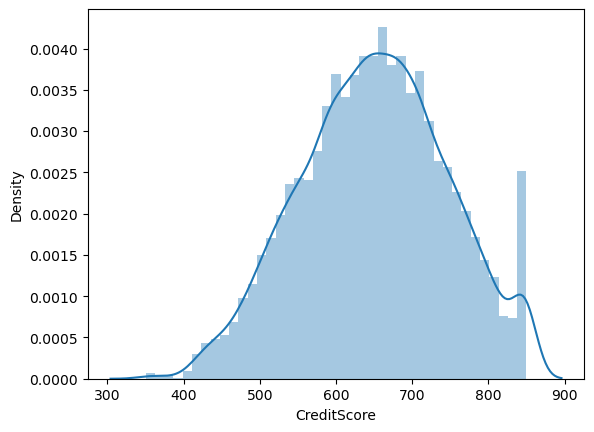

In [14]:
sns.distplot(df["CreditScore"])

<Axes: >

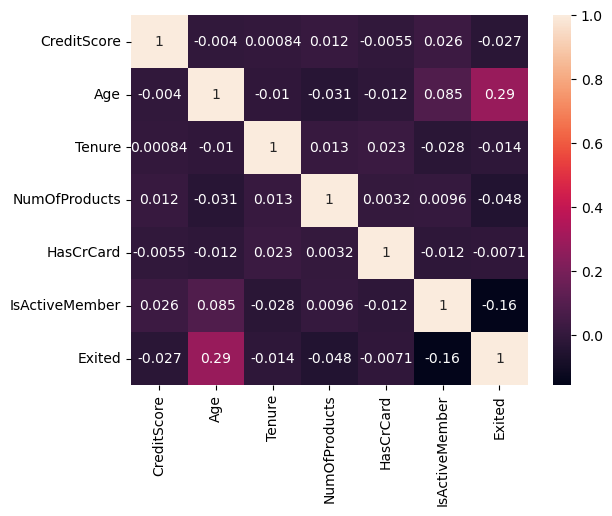

In [15]:
numerical_columns=df.select_dtypes(include=['int64'])
sns.heatmap(data=numerical_columns.corr(),annot=True)
     

In [16]:

df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:

df=pd.get_dummies(columns=["Geography","Gender"],data=df)

In [18]:
x=df.drop("Exited",axis=1)

In [19]:
y=df["Exited"]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [21]:
model_1=LogisticRegression()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your original DataFrame
# ... (Your code to create 'x' and 'y' as before)

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the training data and transform both training and testing data
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

# Now you can fit the model
model_1 = LogisticRegression()
model_1.fit(x_train_encoded, y_train)

LogisticRegression()

In [23]:
model_1.score(x_train_encoded, y_train)  # Use the encoded data for evaluation
     

0.9302857142857143

In [24]:
model_1.score(x_test_encoded,y_test)

0.846

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model_2=DecisionTreeClassifier(max_depth=8)

In [27]:
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [28]:
model_2.score(x_train,y_train)

0.8855714285714286

In [29]:
model_2.score(x_test,y_test)

0.856